grid of mod std vs obs std plots. horizontal = frequency band; vertical = variable

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MultipleLocator
import pandas as pd
from Tools import commonfxns as cf, OAPBuoyData as OAP, mplRC, OAPBuoyComp as bc,viz, evalfxns as ev, \
    frequencyBands as fb
import netCDF4 as nc
import cftime
import datetime as dt
import cmocean
import gsw
#from sklearn.linear_model import TheilSenRegressor
import pickle
import os
import matplotlib as mpl
from IPython.display import Markdown, display, HTML
import astropy.timeseries as apt
from collections import OrderedDict
import warnings
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

mplRC.paperRC2()

In [2]:
# need to add hplus
varlist=['tos','sos','phos','spco2','o2os','chlos'] # need to add ,'hplus'
Tvec=[7,31,365]
freq='daily'

In [3]:
fb.bxfbase

'/work/ebo/calcs/buoyCompTS/bxfs/'

In [4]:
df=pd.read_csv(fb.bxfbase+f"bxf_df.{'_'.join([str(el) for el in Tvec])}.{freq}.csv")

In [5]:
df

,Unnamed: 0,ivar,datasetID,var_1_7_obs,var_7_31_obs,var_31_365_obs,var_g365_obs,var_total_obs,vards_1_7_obs,vards_7_31_obs,...,age_200,tos,sos,intpp,chlos,phos,fgco2,talkos,no3os,MLD_003
0,0,tos,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
1,1,sos,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
2,2,phos,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
3,3,spco2,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
4,4,o2os,pmel_co2_moorings_ba50_a09b_5565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.049253,2.295708,34.608585,2.199882e-07,3.377198e-07,8.136242,1.409763e-09,2.382498,0.003614,79.196892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,425,talkos,pmel_co2_moorings_ca69_976d_4677,44.981570,89.873526,159.504717,50.660241,471.859818,44.920340,86.937021,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220
426,426,omega_a_0,pmel_co2_moorings_ca69_976d_4677,0.003631,0.005966,0.028947,0.020351,0.079842,0.003630,0.005490,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220
427,427,co2dryair,pmel_co2_moorings_ca69_976d_4677,0.115370,0.185493,0.830925,2.386900,4.882939,0.115532,0.176268,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220
428,428,dissicos,pmel_co2_moorings_ca69_976d_4677,119.154025,217.557851,570.919037,293.787276,1665.078705,119.134946,204.033469,...,0.035456,22.819784,34.918438,9.898926e-07,5.454738e-07,8.027735,-7.132149e-10,2.396508,0.007024,10.813220


In [6]:
df.keys()

Index(['Unnamed: 0', 'ivar', 'datasetID', 'var_1_7_obs', 'var_7_31_obs',
       'var_31_365_obs', 'var_g365_obs', 'var_total_obs', 'vards_1_7_obs',
       'vards_7_31_obs', 'vards_31_365_obs', 'vards_g365_obs',
       'vards_total_obs', 'var_seas_obs', 'var_b_seas_obs', 'var_b_1_7_obs',
       'var_b_7_31_obs', 'var_b_31_365_obs', 'var_b_g365_obs',
       'var_b_total_obs', 'vards_b_1_7_obs', 'vards_b_7_31_obs',
       'vards_b_31_365_obs', 'vards_b_g365_obs', 'vards_b_total_obs',
       'var_1_7_mod', 'var_7_31_mod', 'var_31_365_mod', 'var_g365_mod',
       'var_total_mod', 'vards_1_7_mod', 'vards_7_31_mod', 'vards_31_365_mod',
       'vards_g365_mod', 'vards_total_mod', 'var_seas_mod', 'var_1_7_obs_N',
       'var_7_31_obs_N', 'var_31_365_obs_N', 'var_g365_obs_N',
       'var_total_obs_N', 'vards_1_7_obs_N', 'vards_7_31_obs_N',
       'vards_31_365_obs_N', 'vards_g365_obs_N', 'vards_total_obs_N',
       'var_seas_obs_N', 'var_b_seas_obs_N', 'var_b_1_7_obs_N',
       'var_b_7_31_obs_N

Break up into 2 variable chunks

In [7]:
df['ii_2']=[int(el/2) for el in df['ii']]
df['jj_2']=[int(el/2) for el in df['jj']]

In [8]:
df.keys()

Index(['Unnamed: 0', 'ivar', 'datasetID', 'var_1_7_obs', 'var_7_31_obs',
       'var_31_365_obs', 'var_g365_obs', 'var_total_obs', 'vards_1_7_obs',
       'vards_7_31_obs', 'vards_31_365_obs', 'vards_g365_obs',
       'vards_total_obs', 'var_seas_obs', 'var_b_seas_obs', 'var_b_1_7_obs',
       'var_b_7_31_obs', 'var_b_31_365_obs', 'var_b_g365_obs',
       'var_b_total_obs', 'vards_b_1_7_obs', 'vards_b_7_31_obs',
       'vards_b_31_365_obs', 'vards_b_g365_obs', 'vards_b_total_obs',
       'var_1_7_mod', 'var_7_31_mod', 'var_31_365_mod', 'var_g365_mod',
       'var_total_mod', 'vards_1_7_mod', 'vards_7_31_mod', 'vards_31_365_mod',
       'vards_g365_mod', 'vards_total_mod', 'var_seas_mod', 'var_1_7_obs_N',
       'var_7_31_obs_N', 'var_31_365_obs_N', 'var_g365_obs_N',
       'var_total_obs_N', 'vards_1_7_obs_N', 'vards_7_31_obs_N',
       'vards_31_365_obs_N', 'vards_g365_obs_N', 'vards_total_obs_N',
       'var_seas_obs_N', 'var_b_seas_obs_N', 'var_b_1_7_obs_N',
       'var_b_7_31_obs_N

In [9]:
df.ivar.unique()

array(['tos', 'sos', 'phos', 'spco2', 'o2os', 'chlos', 'l10chlos',
       'phosC', 'talkos', 'omega_a_0', 'o2percos', 'co2dryair', 'AOUos',
       'dissicos', 'apco2'], dtype=object)

In [10]:
fstatic1x1='/work/Elise.Olson/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_historical_D1/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_daily_1x1deg/ocean_daily_1x1deg.static.nc'
with nc.Dataset(fstatic1x1) as fstat:
    glon=fstat.variables['geolon'][:]
    glat=fstat.variables['geolat'][:]
    deptho=fstat.variables['deptho'][:]
    wet=fstat.variables['wet'][:]
mask=(deptho>0).astype(float)

In [11]:
# for tos and ph, plot standard deviation of seasonal cycle for obs and model. 
# use background square for model, circle for obs. where obs-pH is not available, use Alk-pH instead and
# mark with triangle instead of circle

In [12]:
testcm=LinearSegmentedColormap.from_list('linseg', 
                                             [(0,    'darkorchid'),
                                              (0.25, 'deepskyblue'),
                                              (.45,    'lightseagreen'),
                                              (.55, 'limegreen'),
                                              (.75,'yellow'),
                                              (1, 'orange')], N=256)

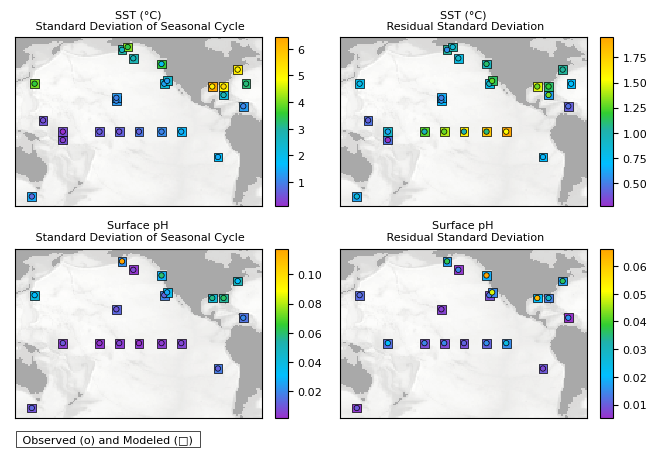

In [13]:
## combine
fig=plt.figure(figsize=(6.5,4.7))
ax0=fig.add_axes(rect=  [.05, .55,  .38,   .36])
ax0cb=fig.add_axes(rect=[.45, .55,  .02,  .36])
ax1=fig.add_axes(rect=  [.55,  .55,  .38,   .36])
ax1cb=fig.add_axes(rect=[.95, .55,  .02,  .36])
ax2=fig.add_axes(rect=  [.05, .1,   .38,   .36])
ax2cb=fig.add_axes(rect=[.45, .1,   .02,  .36])
ax3=fig.add_axes(rect=  [.55,  .1,   .38,   .36])
ax3cb=fig.add_axes(rect=[.95, .1,   .02,  .36])
v1=6500
cmap=cmocean.cm.gray
cmap.set_bad('darkgray')
cmap2=testcm#plt.get_cmap('rainbow')#cmocean.cm.thermal

ax=ax0
cbax=ax0cb
# tos, seasonal cycle std dev
ivar='tos'
ix=(df.ivar=='tos')&~pd.isnull(df.var_seas_obs)
dfi=df.loc[ix,['ii_2','jj_2','var_seas_obs',
                           'var_seas_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.var_seas_obs)
x2=np.sqrt(dfi.var_seas_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Standard Deviation of Seasonal Cycle')

ax=ax1
cbax=ax1cb
# tos, residual st deviation
ivar='tos'
ix=(df.ivar=='tos')&~pd.isnull(df.vards_total_obs)
dfi=df.loc[ix,['ii_2','jj_2','vards_total_obs',
                           'vards_total_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.vards_total_obs)
x2=np.sqrt(dfi.vards_total_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Residual Standard Deviation')

ax=ax2
cbax=ax2cb
# phos, seasonal cycle std dev
ivar='phos'
ix=((df.ivar=='phos')|(df.ivar=='phosC'))&~pd.isnull(df.var_seas_obs)
dfi=df.loc[ix,['ii_2','jj_2','var_seas_obs',
                           'var_seas_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.var_seas_obs)
x2=np.sqrt(dfi.var_seas_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Standard Deviation of Seasonal Cycle')

ax=ax3
cbax=ax3cb
# phos, residual st deviation
ivar='phos'
ix=((df.ivar=='phos')|(df.ivar=='phosC'))&~pd.isnull(df.vards_total_obs)
dfi=df.loc[ix,['ii_2','jj_2','vards_total_obs',
                           'vards_total_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.vards_total_obs)
x2=np.sqrt(dfi.vards_total_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Residual Standard Deviation')

t = ax2.text(133, 20, " Observed (o) and Modeled (□) ",
            ha="left", va="center", size=8,
            bbox=dict(boxstyle="square",pad=0.3,
                      fc="w", ec="k", lw=.5))

fig.savefig('/home/ebo/OAPMSE/paperFigs/varMaps-points.png',dpi=400,bbox_inches='tight')

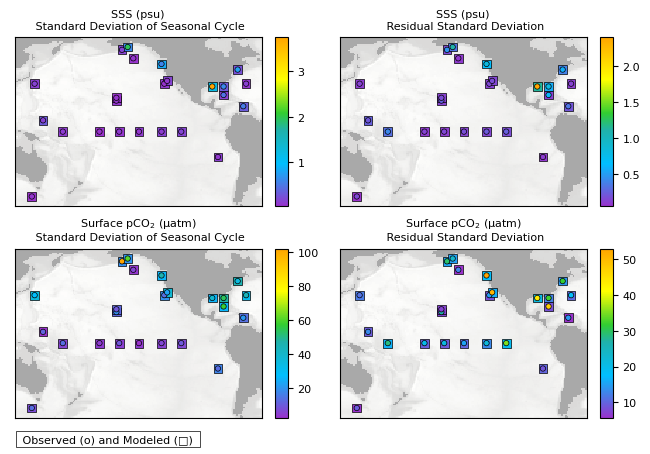

In [14]:
## combine
fig=plt.figure(figsize=(6.5,4.7))
ax0=fig.add_axes(rect=  [.05, .55,  .38,   .36])
ax0cb=fig.add_axes(rect=[.45, .55,  .02,  .36])
ax1=fig.add_axes(rect=  [.55,  .55,  .38,   .36])
ax1cb=fig.add_axes(rect=[.95, .55,  .02,  .36])
ax2=fig.add_axes(rect=  [.05, .1,   .38,   .36])
ax2cb=fig.add_axes(rect=[.45, .1,   .02,  .36])
ax3=fig.add_axes(rect=  [.55,  .1,   .38,   .36])
ax3cb=fig.add_axes(rect=[.95, .1,   .02,  .36])
v1=6500
cmap=cmocean.cm.gray
cmap.set_bad('darkgray')
cmap2=testcm#plt.get_cmap('rainbow')#cmocean.cm.thermal

ax=ax0
cbax=ax0cb
# tos, seasonal cycle std dev
ivar='sos'
ix=(df.ivar==ivar)&~pd.isnull(df.var_seas_obs)
dfi=df.loc[ix,['ii_2','jj_2','var_seas_obs',
                           'var_seas_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.var_seas_obs)
x2=np.sqrt(dfi.var_seas_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Standard Deviation of Seasonal Cycle')

ax=ax1
cbax=ax1cb
# tos, residual st deviation
ivar='sos'
ix=(df.ivar==ivar)&~pd.isnull(df.vards_total_obs)
dfi=df.loc[ix,['ii_2','jj_2','vards_total_obs',
                           'vards_total_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.vards_total_obs)
x2=np.sqrt(dfi.vards_total_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Residual Standard Deviation')

ax=ax2
cbax=ax2cb
# phos, seasonal cycle std dev
ivar='spco2'
ix=((df.ivar==ivar))&~pd.isnull(df.var_seas_obs)
dfi=df.loc[ix,['ii_2','jj_2','var_seas_obs',
                           'var_seas_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.var_seas_obs)
x2=np.sqrt(dfi.var_seas_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Standard Deviation of Seasonal Cycle')

ax=ax3
cbax=ax3cb
# phos, residual st deviation
ivar='spco2'
ix=((df.ivar==ivar))&~pd.isnull(df.vards_total_obs)
dfi=df.loc[ix,['ii_2','jj_2','vards_total_obs',
                           'vards_total_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.vards_total_obs)
x2=np.sqrt(dfi.vards_total_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Residual Standard Deviation')

t = ax2.text(133, 20, " Observed (o) and Modeled (□) ",
            ha="left", va="center", size=8,
            bbox=dict(boxstyle="square",pad=0.3,
                      fc="w", ec="k", lw=.5))

fig.savefig('/home/ebo/OAPMSE/paperFigs/varMaps_S_pCO2-points.png',dpi=400,bbox_inches='tight')

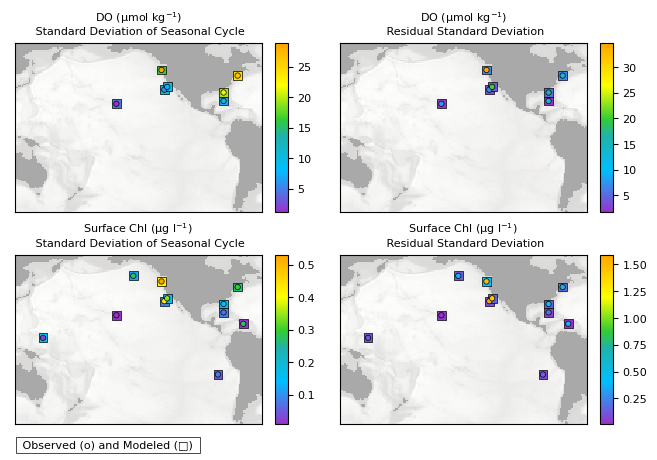

In [15]:
## combine
fig=plt.figure(figsize=(6.5,4.7))
ax0=fig.add_axes(rect=  [.05, .55,  .38,   .36])
ax0cb=fig.add_axes(rect=[.45, .55,  .02,  .36])
ax1=fig.add_axes(rect=  [.55,  .55,  .38,   .36])
ax1cb=fig.add_axes(rect=[.95, .55,  .02,  .36])
ax2=fig.add_axes(rect=  [.05, .1,   .38,   .36])
ax2cb=fig.add_axes(rect=[.45, .1,   .02,  .36])
ax3=fig.add_axes(rect=  [.55,  .1,   .38,   .36])
ax3cb=fig.add_axes(rect=[.95, .1,   .02,  .36])
v1=6500
cmap=cmocean.cm.gray
cmap.set_bad('darkgray')
cmap2=testcm#plt.get_cmap('rainbow')#cmocean.cm.thermal

ax=ax0
cbax=ax0cb
# tos, seasonal cycle std dev
ivar='o2os'
ix=(df.ivar==ivar)&~pd.isnull(df.var_seas_obs)
dfi=df.loc[ix,['ii_2','jj_2','var_seas_obs',
                           'var_seas_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.var_seas_obs)
x2=np.sqrt(dfi.var_seas_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Standard Deviation of Seasonal Cycle')

ax=ax1
cbax=ax1cb
# tos, residual st deviation
ivar='o2os'
ix=(df.ivar==ivar)&~pd.isnull(df.vards_total_obs)
dfi=df.loc[ix,['ii_2','jj_2','vards_total_obs',
                           'vards_total_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.vards_total_obs)
x2=np.sqrt(dfi.vards_total_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Residual Standard Deviation')

ax=ax2
cbax=ax2cb
# phos, seasonal cycle std dev
ivar='chlos'
ix=((df.ivar==ivar))&~pd.isnull(df.var_seas_obs)
dfi=df.loc[ix,['ii_2','jj_2','var_seas_obs',
                           'var_seas_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.var_seas_obs)
x2=np.sqrt(dfi.var_seas_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Standard Deviation of Seasonal Cycle')

ax=ax3
cbax=ax3cb
# phos, residual st deviation
ivar='chlos'
ix=((df.ivar==ivar))&~pd.isnull(df.vards_total_obs)
dfi=df.loc[ix,['ii_2','jj_2','vards_total_obs',
                           'vards_total_mod']].groupby(['ii_2','jj_2']).mean().reset_index()
m=ax.pcolormesh(deptho,shading='auto',vmin=-8*v1,vmax=v1,cmap=cmap)
ax.set_aspect(1)
x1=np.sqrt(dfi.vards_total_obs)
x2=np.sqrt(dfi.vards_total_mod)
vmin=min(np.min(x1),np.min(x2))
vmax=max(np.max(x1),np.max(x2))
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x2,
          s=40,cmap=cmap2,marker='s',edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
m=ax.scatter(dfi.ii_2*2,dfi.jj_2*2,c=x1,
          s=15,cmap=cmap2,edgecolors='k',linewidth=.5,vmin=vmin,vmax=vmax)
cb=fig.colorbar(m,cax=cbax)
ax.axis([130,305,35,155,])
ax.set_xticks([])
ax.set_yticks([])

ax.set_title(f'{bc.dispNameUnits[ivar]}\n Residual Standard Deviation')

t = ax2.text(133, 20, " Observed (o) and Modeled (□) ",
            ha="left", va="center", size=8,
            bbox=dict(boxstyle="square",pad=0.3,
                      fc="w", ec="k", lw=.5))

fig.savefig('/home/ebo/OAPMSE/paperFigs/varMaps_o2_chl-points.png',dpi=400,bbox_inches='tight')